In [431]:
import numpy as np 
import pandas as pd 
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns 
import matplotlib.pyplot as plt
from datasist.structdata import detect_outliers 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, f1_score

In [432]:
df = pd.read_csv(r"C:\Users\mahmoud\Desktop\Cellula intern\first inten project.csv")

In [433]:
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


In [434]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [435]:
 df.isna().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

In [436]:
df.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [437]:
df.columns=df.columns.str.strip().str.replace(" ","_").str.replace("-","_").str.lower()


In [438]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status'],
      dtype='object')

In [439]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  object 
 1   number_of_adults          36285 non-null  int64  
 2   number_of_children        36285 non-null  int64  
 3   number_of_weekend_nights  36285 non-null  int64  
 4   number_of_week_nights     36285 non-null  int64  
 5   type_of_meal              36285 non-null  object 
 6   car_parking_space         36285 non-null  int64  
 7   room_type                 36285 non-null  object 
 8   lead_time                 36285 non-null  int64  
 9   market_segment_type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  p_c                       36285 non-null  int64  
 12  p_not_c                   36285 non-null  int64  
 13  average_price             36285 non-null  float64
 14  specia

In [440]:
df=df.convert_dtypes()

In [441]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   booking_id                36285 non-null  string 
 1   number_of_adults          36285 non-null  Int64  
 2   number_of_children        36285 non-null  Int64  
 3   number_of_weekend_nights  36285 non-null  Int64  
 4   number_of_week_nights     36285 non-null  Int64  
 5   type_of_meal              36285 non-null  string 
 6   car_parking_space         36285 non-null  Int64  
 7   room_type                 36285 non-null  string 
 8   lead_time                 36285 non-null  Int64  
 9   market_segment_type       36285 non-null  string 
 10  repeated                  36285 non-null  Int64  
 11  p_c                       36285 non-null  Int64  
 12  p_not_c                   36285 non-null  Int64  
 13  average_price             36285 non-null  Float64
 14  specia

In [442]:
df.head()

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,date_of_reservation,booking_status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.0,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.0,0,4/11/2018,Canceled


In [443]:
df["number_of_total_individuals"]=df["number_of_adults"]+df["number_of_children"]
df["number_of_nights"]=df["number_of_week_nights"]+df["number_of_weekend_nights"]

In [444]:
df.head()

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,date_of_reservation,booking_status,number_of_total_individuals,number_of_nights
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.0,0,10/2/2015,Not_Canceled,2,7
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled,1,4
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.0,0,2/28/2018,Canceled,3,4
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.0,1,5/20/2017,Canceled,1,2
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.0,0,4/11/2018,Canceled,1,3


In [445]:
df.describe()

,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,car_parking_space,lead_time,repeated,p_c,p_not_c,average_price,special_requests,number_of_total_individuals,number_of_nights
count,36285.0,36285.0,36285.0,36285.0,36285.0,36285.0,36285.0,36285.0,36285.0,36285.0,36285.0,36285.0,36285.0
mean,1.844839,0.10536,0.810693,2.204602,0.030977,85.239851,0.02563,0.023343,0.153369,103.421636,0.619733,1.9502,3.015296
std,0.518813,0.402704,0.87059,1.410946,0.173258,85.938796,0.158032,0.368281,1.753931,35.086469,0.786262,0.650361,1.786
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25%,2.0,0.0,0.0,1.0,0.0,17.0,0.0,0.0,0.0,80.3,0.0,2.0,2.0
50%,2.0,0.0,1.0,2.0,0.0,57.0,0.0,0.0,0.0,99.45,0.0,2.0,3.0
75%,2.0,0.0,2.0,3.0,0.0,126.0,0.0,0.0,0.0,120.0,1.0,2.0,4.0
max,4.0,10.0,7.0,17.0,1.0,443.0,1.0,13.0,58.0,540.0,5.0,12.0,24.0


In [446]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'number_of_total_individuals',
       'number_of_nights'],
      dtype='object')

In [447]:
df['date_of_reservation'] = pd.to_datetime(df['date_of_reservation'], errors='coerce')


In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   booking_id                   36285 non-null  string        
 1   number_of_adults             36285 non-null  Int64         
 2   number_of_children           36285 non-null  Int64         
 3   number_of_weekend_nights     36285 non-null  Int64         
 4   number_of_week_nights        36285 non-null  Int64         
 5   type_of_meal                 36285 non-null  string        
 6   car_parking_space            36285 non-null  Int64         
 7   room_type                    36285 non-null  string        
 8   lead_time                    36285 non-null  Int64         
 9   market_segment_type          36285 non-null  string        
 10  repeated                     36285 non-null  Int64         
 11  p_c                          36285 non-nu

In [449]:
df.isna().sum()

booking_id                      0
number_of_adults                0
number_of_children              0
number_of_weekend_nights        0
number_of_week_nights           0
type_of_meal                    0
car_parking_space               0
room_type                       0
lead_time                       0
market_segment_type             0
repeated                        0
p_c                             0
p_not_c                         0
average_price                   0
special_requests                0
date_of_reservation            37
booking_status                  0
number_of_total_individuals     0
number_of_nights                0
dtype: int64

In [450]:
df[df['date_of_reservation'].isnull()].index


Index([ 2626,  3677,  5600,  6343,  7648,  8000,  8989,  9153,  9245,  9664,
        9934, 10593, 10652, 10747, 11881, 13958, 14304, 15363, 15438, 17202,
       18380, 18534, 18680, 19013, 20419, 21674, 21688, 26108, 27559, 27928,
       30552, 30616, 30632, 30839, 32041, 34638, 35481],
      dtype='int64')

In [451]:
df.dropna(axis=0,inplace=True) 

In [452]:
df.isna().sum()

booking_id                     0
number_of_adults               0
number_of_children             0
number_of_weekend_nights       0
number_of_week_nights          0
type_of_meal                   0
car_parking_space              0
room_type                      0
lead_time                      0
market_segment_type            0
repeated                       0
p_c                            0
p_not_c                        0
average_price                  0
special_requests               0
date_of_reservation            0
booking_status                 0
number_of_total_individuals    0
number_of_nights               0
dtype: int64

In [453]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   booking_id                   36248 non-null  string        
 1   number_of_adults             36248 non-null  Int64         
 2   number_of_children           36248 non-null  Int64         
 3   number_of_weekend_nights     36248 non-null  Int64         
 4   number_of_week_nights        36248 non-null  Int64         
 5   type_of_meal                 36248 non-null  string        
 6   car_parking_space            36248 non-null  Int64         
 7   room_type                    36248 non-null  string        
 8   lead_time                    36248 non-null  Int64         
 9   market_segment_type          36248 non-null  string        
 10  repeated                     36248 non-null  Int64         
 11  p_c                          36248 non-null  I

In [454]:
df['day_name']=df['date_of_reservation'].dt.day_name()
df['month']=df['date_of_reservation'].dt.month
df['year']=df['date_of_reservation'].dt.year


In [455]:
df.head()

,booking_id,number_of_adults,number_of_children,number_of_weekend_nights,number_of_week_nights,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,...,p_not_c,average_price,special_requests,date_of_reservation,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,...,0,88.0,0,2015-10-02,Not_Canceled,2,7,Friday,10,2015
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,...,0,106.68,1,2018-11-06,Not_Canceled,1,4,Tuesday,11,2018
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,...,0,50.0,0,2018-02-28,Canceled,3,4,Wednesday,2,2018
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,...,0,100.0,1,2017-05-20,Canceled,1,2,Saturday,5,2017
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,...,0,77.0,0,2018-04-11,Canceled,1,3,Wednesday,4,2018


In [456]:
df.columns

Index(['booking_id', 'number_of_adults', 'number_of_children',
       'number_of_weekend_nights', 'number_of_week_nights', 'type_of_meal',
       'car_parking_space', 'room_type', 'lead_time', 'market_segment_type',
       'repeated', 'p_c', 'p_not_c', 'average_price', 'special_requests',
       'date_of_reservation', 'booking_status', 'number_of_total_individuals',
       'number_of_nights', 'day_name', 'month', 'year'],
      dtype='object')

In [457]:
df['market_segment_type'].unique()

<StringArray>
['Offline', 'Online', 'Corporate', 'Aviation', 'Complementary']
Length: 5, dtype: string

In [458]:
df['number_of_total_individuals'].unique()

<IntegerArray>
[2, 1, 3, 4, 5, 12, 10, 11]
Length: 8, dtype: Int64

In [459]:
df['booking_status'].unique()

<StringArray>
['Not_Canceled', 'Canceled']
Length: 2, dtype: string

In [460]:
df['special_requests'].unique()

<IntegerArray>
[0, 1, 3, 2, 4, 5]
Length: 6, dtype: Int64

In [461]:
df['room_type'].unique()

<StringArray>
['Room_Type 1', 'Room_Type 4', 'Room_Type 2', 'Room_Type 6', 'Room_Type 5',
 'Room_Type 7', 'Room_Type 3']
Length: 7, dtype: string

In [462]:
df['type_of_meal'].unique()

<StringArray>
['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3']
Length: 4, dtype: string

In [463]:
df.drop(["number_of_adults","number_of_children","number_of_weekend_nights","number_of_week_nights","date_of_reservation"],axis=1,inplace=True)

<Axes: >

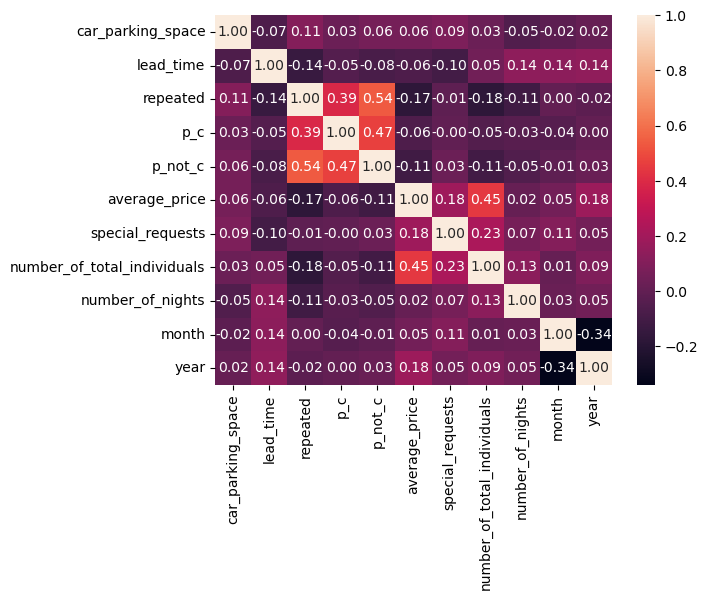

In [464]:
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".2f")

In [465]:
px.box(df,x=df["average_price"])

In [466]:
df[df["average_price"]==df["average_price"].max()]

,booking_id,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
33114,INN33115,Meal Plan 1,0,Room_Type 1,35,Offline,0,0,0,540.0,0,Canceled,2,1,Sunday,3,2018


In [467]:
df[df["average_price"]>=179.5].shape[0]

1067

In [468]:
df.groupby("year")[["average_price"]].mean()

,average_price
year,
2015,88.0
2016,100.0
2017,90.032118
2018,106.373606


In [469]:
index=detect_outliers(df,0,["average_price"])
df.loc[index, "average_price"] = df["average_price"].median()

In [470]:
px.box(df,x=df["average_price"])

In [471]:
px.box(df,x=df["lead_time"])

In [472]:
df[df["lead_time"]>=290].shape[0]

1332

In [473]:
df[(df["lead_time"]>=290)&(df["booking_status"]=="Canceled")].shape[0]

1070

In [474]:
df[(df["lead_time"]>=290)&(df["booking_status"]=="Not_Canceled")].shape[0]

262

In [475]:
df["lead_time"].nunique()

352

In [476]:
px.histogram(df,x=df["lead_time"])

In [477]:
df.groupby(df["lead_time"])[["lead_time"]].count()

,lead_time
lead_time,
0,1295
1,1078
2,643
3,626
4,627
...,...
381,2
386,69
418,60


In [478]:
bins = [-1, 1, 7, 30, 365, float('inf')]
labels = ["Same Day", "Short Notice", "Medium Term", "Long Term", "Very Long Term"]
df["lead_time"] = pd.cut(df["lead_time"], bins=bins, labels=labels)


In [479]:
df.head()

,booking_id,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,INN00001,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,7,Friday,10,2015
1,INN00002,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,4,Tuesday,11,2018
2,INN00003,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,4,Wednesday,2,2018
3,INN00004,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,2,Saturday,5,2017
4,INN00005,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,3,Wednesday,4,2018


In [480]:
df['lead_time'].unique()

['Long Term', 'Short Notice', 'Same Day', 'Medium Term', 'Very Long Term']
Categories (5, object): ['Same Day' < 'Short Notice' < 'Medium Term' < 'Long Term' < 'Very Long Term']

In [481]:
df.columns

Index(['booking_id', 'type_of_meal', 'car_parking_space', 'room_type',
       'lead_time', 'market_segment_type', 'repeated', 'p_c', 'p_not_c',
       'average_price', 'special_requests', 'booking_status',
       'number_of_total_individuals', 'number_of_nights', 'day_name', 'month',
       'year'],
      dtype='object')

In [482]:
px.box(df,x=df["number_of_nights"])

In [483]:
df[df["number_of_nights"]==24]

,booking_id,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
19512,INN19513,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,90.95,1,Canceled,2,24,Wednesday,7,2018


In [484]:
sorted(df["number_of_nights"].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

In [485]:
df.groupby(df["number_of_nights"])["p_c"].count()

number_of_nights
0        78
1      6600
2      8467
3     10042
4      5887
5      2590
6      1028
7       974
8       179
9       111
10      108
11       39
12       24
13       18
14       32
15       31
16        6
17        5
18        3
19        6
20       11
21        4
22        2
23        2
24        1
Name: p_c, dtype: Int64

In [486]:
bins = [-1, 0, 3, 7, 14, float('inf')]
labels = ["Day Use", "Short Stay", "Week Stay", "Two Weeks Stay", "Long Stay"]
df["number_of_nights"] = pd.cut(df["number_of_nights"], bins=bins, labels=labels)


In [487]:
df.head()

,booking_id,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,INN00001,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015
1,INN00002,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018
2,INN00003,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018
3,INN00004,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,Short Stay,Saturday,5,2017
4,INN00005,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018


In [488]:
df.groupby(df["number_of_total_individuals"])["p_c"].count()

number_of_total_individuals
1      7537
2     23933
3      3850
4       910
5        15
10        1
11        1
12        1
Name: p_c, dtype: Int64

In [489]:
df[df["number_of_total_individuals"].isin([10, 11, 12])]

,booking_id,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
6338,INN06339,Meal Plan 1,0,Room_Type 4,Long Term,Online,0,0,0,84.45,1,Not_Canceled,12,Short Stay,Friday,1,2018
10041,INN10042,Meal Plan 1,0,Room_Type 1,Medium Term,Corporate,0,0,0,95.0,0,Not_Canceled,10,Short Stay,Wednesday,10,2017
10061,INN10062,Meal Plan 1,0,Room_Type 2,Medium Term,Online,0,0,0,76.5,1,Canceled,11,Week Stay,Sunday,8,2017


In [490]:
def group_large(x):
    if x > 5:
        return "Group"
    return x

df["number_of_total_individuals"] = df["number_of_total_individuals"].apply(group_large)


In [491]:
df[df["number_of_total_individuals"]=="Group"]

,booking_id,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
6338,INN06339,Meal Plan 1,0,Room_Type 4,Long Term,Online,0,0,0,84.45,1,Not_Canceled,Group,Short Stay,Friday,1,2018
10041,INN10042,Meal Plan 1,0,Room_Type 1,Medium Term,Corporate,0,0,0,95.0,0,Not_Canceled,Group,Short Stay,Wednesday,10,2017
10061,INN10062,Meal Plan 1,0,Room_Type 2,Medium Term,Online,0,0,0,76.5,1,Canceled,Group,Week Stay,Sunday,8,2017


In [492]:
df.head()

,booking_id,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,INN00001,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015
1,INN00002,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018
2,INN00003,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018
3,INN00004,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,Short Stay,Saturday,5,2017
4,INN00005,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018


In [493]:
df['special_requests'].unique()

<IntegerArray>
[0, 1, 3, 2, 4, 5]
Length: 6, dtype: Int64

In [494]:
df.groupby("special_requests")[["p_c"]].count()

,p_c
special_requests,
0,19754
1,11369
2,4363
3,676
4,78
5,8


In [495]:
df.groupby("car_parking_space")["booking_status"].value_counts(normalize=True)


car_parking_space  booking_status
0                  Not_Canceled      0.664987
                   Canceled          0.335013
1                  Not_Canceled      0.898305
                   Canceled          0.101695
Name: proportion, dtype: float64

In [496]:
df.groupby("p_c")["booking_status"].value_counts()


p_c  booking_status
0    Not_Canceled      24044
     Canceled          11867
1    Not_Canceled        187
     Canceled             10
2    Not_Canceled         46
3    Not_Canceled         42
     Canceled              1
4    Not_Canceled         10
5    Not_Canceled         11
6    Not_Canceled          1
11   Not_Canceled         25
13   Canceled              4
Name: count, dtype: int64

In [497]:
df.columns

Index(['booking_id', 'type_of_meal', 'car_parking_space', 'room_type',
       'lead_time', 'market_segment_type', 'repeated', 'p_c', 'p_not_c',
       'average_price', 'special_requests', 'booking_status',
       'number_of_total_individuals', 'number_of_nights', 'day_name', 'month',
       'year'],
      dtype='object')

In [498]:

index=detect_outliers(df,0,["average_price"])
df.loc[index, "average_price"] = df["average_price"].median()

In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36248 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   booking_id                   36248 non-null  string  
 1   type_of_meal                 36248 non-null  string  
 2   car_parking_space            36248 non-null  Int64   
 3   room_type                    36248 non-null  string  
 4   lead_time                    36248 non-null  category
 5   market_segment_type          36248 non-null  string  
 6   repeated                     36248 non-null  Int64   
 7   p_c                          36248 non-null  Int64   
 8   p_not_c                      36248 non-null  Int64   
 9   average_price                36248 non-null  Float64 
 10  special_requests             36248 non-null  Int64   
 11  booking_status               36248 non-null  string  
 12  number_of_total_individuals  36248 non-null  object  
 13  number

In [500]:
df.drop('booking_id', axis=1, inplace=True)

In [501]:
df.head()

,type_of_meal,car_parking_space,room_type,lead_time,market_segment_type,repeated,p_c,p_not_c,average_price,special_requests,booking_status,number_of_total_individuals,number_of_nights,day_name,month,year
0,Meal Plan 1,0,Room_Type 1,Long Term,Offline,0,0,0,88.0,0,Not_Canceled,2,Week Stay,Friday,10,2015
1,Not Selected,0,Room_Type 1,Short Notice,Online,0,0,0,106.68,1,Not_Canceled,1,Week Stay,Tuesday,11,2018
2,Meal Plan 1,0,Room_Type 1,Same Day,Online,0,0,0,50.0,0,Canceled,3,Week Stay,Wednesday,2,2018
3,Meal Plan 1,0,Room_Type 1,Long Term,Online,0,0,0,100.0,1,Canceled,1,Short Stay,Saturday,5,2017
4,Not Selected,0,Room_Type 1,Long Term,Online,0,0,0,77.0,0,Canceled,1,Short Stay,Wednesday,4,2018


In [502]:
df['cancellation_ratio'] = df.apply(
    lambda row: 0 if row["repeated"] == 0 else row['p_c'] / (row['p_c'] + row['p_not_c']),
    axis=1
)

In [503]:
df['first_time_visitor'] = (1 - df['repeated'])

In [504]:
df.drop(['p_c', 'p_not_c', 'repeated'], axis=1, inplace=True)

In [505]:
day_mapping = {
    "Friday": 0,
    "Saturday": 1,
    "Sunday":2,
    "Monday":3,
    "Tuesday": 4,
    "Wednesday": 5,
    "Thursday":6
}

# Apply mapping
df['day_name']=df['day_name'].map(day_mapping)

In [506]:
room_type_maping={
      "Room_Type 1":0,
      "Room_Type 2":1,
      "Room_Type 3":2,
      "Room_Type 4":3,
      "Room_Type 5":4,
      "Room_Type 6":5,
}
df['room_type']=df['room_type'].map(day_mapping)

In [507]:
lead_time_mapping = {
    "Same Day": 0,
    "Short Notice": 1,
    "Medium Term": 2,
    "Long Term": 3,
    "Very Long Term": 4
}

df["lead_time"] = df["lead_time"].map(lead_time_mapping)


In [508]:
stay_mapping = {
    "Day Use": 0,
    "Short Stay": 1,
    "Week Stay": 2,
    "Two Weeks Stay": 3,
    "Long Stay": 4
}

df["number_of_nights"] = df["number_of_nights"].map(stay_mapping)


In [509]:
df=pd.get_dummies(df,columns=["type_of_meal","room_type","market_segment_type","booking_status"],drop_first=True)

In [510]:
df=pd.get_dummies(df,columns=["number_of_total_individuals"],drop_first=True)

In [511]:
df.head()

,car_parking_space,lead_time,average_price,special_requests,number_of_nights,day_name,month,year,cancellation_ratio,first_time_visitor,...,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,booking_status_Not_Canceled,number_of_total_individuals_2,number_of_total_individuals_3,number_of_total_individuals_4,number_of_total_individuals_5,number_of_total_individuals_Group
0,0,3,88.0,0,2,0,10,2015,0.0,1,...,False,False,True,False,True,True,False,False,False,False
1,0,1,106.68,1,2,4,11,2018,0.0,1,...,False,False,False,True,True,False,False,False,False,False
2,0,0,50.0,0,2,5,2,2018,0.0,1,...,False,False,False,True,False,False,True,False,False,False
3,0,3,100.0,1,1,1,5,2017,0.0,1,...,False,False,False,True,False,False,False,False,False,False
4,0,3,77.0,0,1,5,4,2018,0.0,1,...,False,False,False,True,False,False,False,False,False,False


In [512]:
df.columns

Index(['car_parking_space', 'lead_time', 'average_price', 'special_requests',
       'number_of_nights', 'day_name', 'month', 'year', 'cancellation_ratio',
       'first_time_visitor', 'type_of_meal_Meal Plan 2',
       'type_of_meal_Meal Plan 3', 'type_of_meal_Not Selected',
       'market_segment_type_Complementary', 'market_segment_type_Corporate',
       'market_segment_type_Offline', 'market_segment_type_Online',
       'booking_status_Not_Canceled', 'number_of_total_individuals_2',
       'number_of_total_individuals_3', 'number_of_total_individuals_4',
       'number_of_total_individuals_5', 'number_of_total_individuals_Group'],
      dtype='object')

In [513]:
x=df.drop("booking_status_Not_Canceled",axis=1)
y=df["booking_status_Not_Canceled"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=65)

In [514]:

scaler = StandardScaler()
x_train["average_price"] = scaler.fit_transform(x_train[["average_price"]])
x_test["average_price"] = scaler.transform(x_test[["average_price"]])


In [515]:
! pip install xgboost 

Defaulting to user installation because normal site-packages is not writeable


In [516]:
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced'),
    "Random Forest": RandomForestClassifier(class_weight='balanced'),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": xgb.XGBClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced')
}
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)  
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("-" * 30)

c:\myanaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model: Logistic Regression
Accuracy: 0.6924
F1 Score: 0.7389
------------------------------
Model: Random Forest
Accuracy: 0.8636
F1 Score: 0.8983
------------------------------
Model: Gradient Boosting
Accuracy: 0.8028
F1 Score: 0.8581
------------------------------


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, the experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:lead_time: category, number_of_nights: category